**Loading the python libraries and dataset**

In [165]:
# Loading the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
# Loading the Bigmart Training data
train_url = "/kaggle/input/big-mart-dataset/Train.csv"
bigmart_train_df = pd.read_csv(train_url)

**Cleaning the Training data**

In [167]:
# Sorting the rows
bigmart_train_df = bigmart_train_df.sort_values(by=['Item_Identifier','Item_Outlet_Sales'],ascending=[True,False])

# Checking First Five Rows in Dataframe
bigmart_train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924


In [168]:
# Finding count of null values
bigmart_train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [169]:
# Replacing Null values 
avg_weight = np.mean(bigmart_train_df.Item_Weight)
bigmart_train_df.Item_Weight = bigmart_train_df.Item_Weight.fillna(avg_weight)

bigmart_train_df.Outlet_Size = bigmart_train_df.Outlet_Size.fillna("Medium")
bigmart_train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [170]:
# Checking if any Inconsistent Data Entry
bigmart_train_df['Item_Fat_Content'] = bigmart_train_df['Item_Fat_Content'].str.lower()
bigmart_train_df['Item_Fat_Content'].unique()

array(['low fat', 'lf', 'regular', 'reg'], dtype=object)

In [171]:
# Fixing Inconsistent Data Entry
bigmart_train_df.Item_Fat_Content = bigmart_train_df.Item_Fat_Content.astype('str')
bigmart_train_df.Item_Fat_Content = bigmart_train_df.Item_Fat_Content.replace("lf", "low fat")
bigmart_train_df.Item_Fat_Content = bigmart_train_df.Item_Fat_Content.replace("reg", "regular")
bigmart_train_df.Item_Fat_Content.unique()

array(['low fat', 'regular'], dtype=object)

**Visualizing the Training data**

Text(0.5, 0, 'Sales')

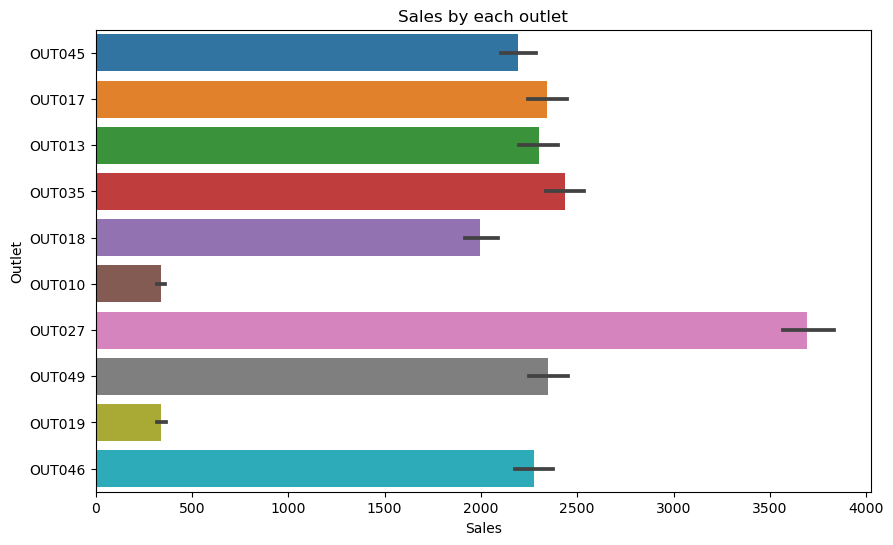

In [172]:
# Plotting Sales in each Outlet using a Barchart
plt.figure(figsize=(10,6))
plt.title("Sales by each outlet")
sns.barplot(y=bigmart_train_df.Outlet_Identifier,x=bigmart_train_df.Item_Outlet_Sales)
plt.ylabel("Outlet")
plt.xlabel("Sales")

Text(0, 0.5, 'Sales')

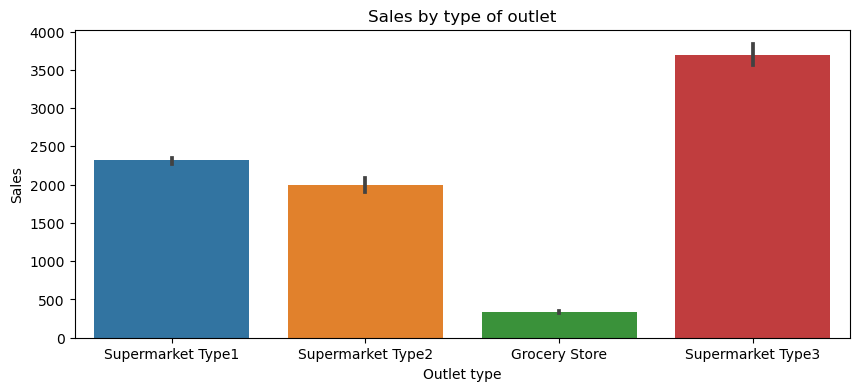

In [173]:
# Plotting Sales by each type of Outlet using Barplot
plt.figure(figsize=(10,4))
plt.title("Sales by type of outlet")
sns.barplot(x=bigmart_train_df.Outlet_Type,y=bigmart_train_df.Item_Outlet_Sales)
plt.xlabel("Outlet type")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

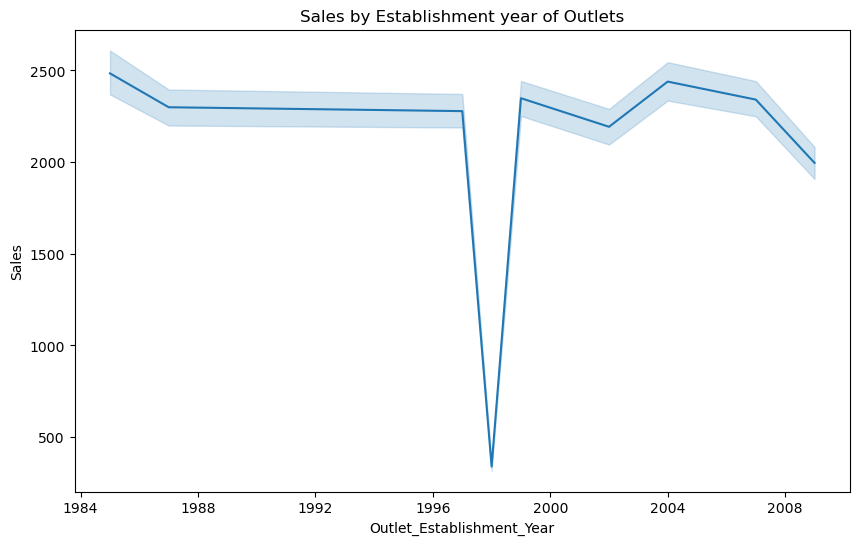

In [174]:
# Plotting Trend of Sales by establishment_year of outlet using lineplot
new_dataframe = pd.read_csv("/kaggle/input/big-mart-dataset/Train.csv",index_col="Outlet_Establishment_Year",parse_dates=True)
plt.figure(figsize=[10,6])
plt.title("Sales by Establishment year of Outlets")
sns.lineplot(data=new_dataframe['Item_Outlet_Sales'],)
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

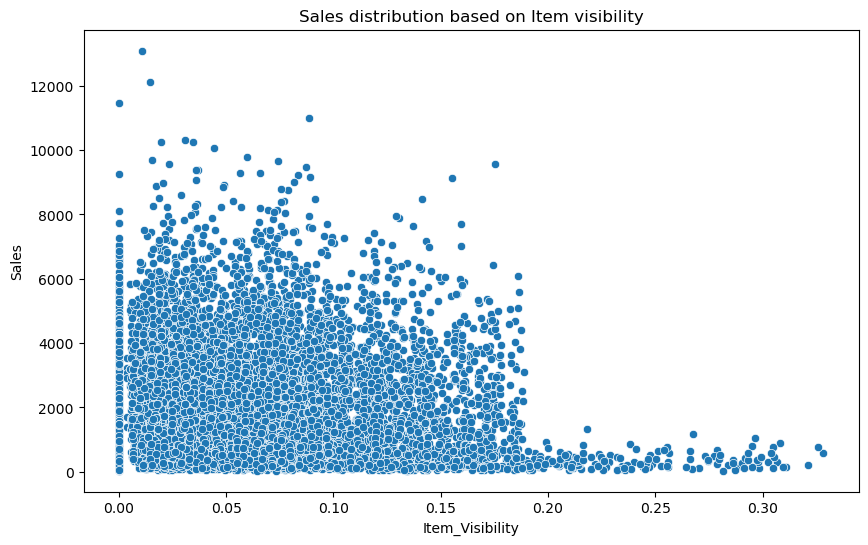

In [175]:
# Plotting the effect of visibility of items on sales distribution using scatterplot
plt.figure(figsize=(10,6))
plt.title("Sales distribution based on Item visibility")
sns.scatterplot(x=bigmart_train_df['Item_Visibility'], y=bigmart_train_df['Item_Outlet_Sales'])
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

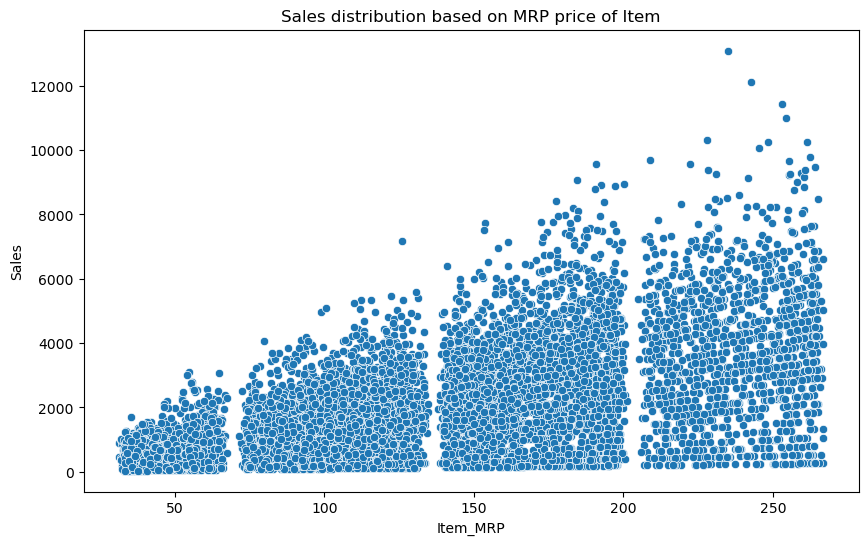

In [176]:
# plotting the Effect of MRP prices of items on sales distribution using scatterplot
plt.figure(figsize=(10,6))
plt.title("Sales distribution based on MRP price of Item")
sns.scatterplot(x=bigmart_train_df['Item_MRP'], y=bigmart_train_df['Item_Outlet_Sales'])
plt.ylabel("Sales")

([<matplotlib.patches.Wedge at 0x7f9cccebc820>,
 [Text(-0.9842966129176849, -0.49108062250385487, 'low fat'),
  Text(0.9842966129176849, 0.4910806225038547, 'regular')],
 [Text(-0.5368890615914644, -0.2678621577293753, '64.731'),
  Text(0.5368890615914644, 0.26786215772937527, '35.269')])

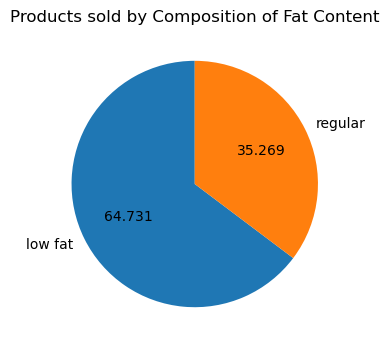

In [177]:
# plotting the Effect of Fat content on sale of items using Piechart
plt.figure(figsize=(8,4))
plt.title("Products sold by Composition of Fat Content")
plt.pie(bigmart_train_df['Item_Fat_Content'].value_counts(),startangle=90,autopct='%.3f',
         labels=['low fat','regular'])

**Average Sales in each outlet of Training data**

In [178]:
bigmart_train_df.groupby(['Outlet_Identifier']).Item_Outlet_Sales.mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

**Preprocessing the Training data**

In [179]:
bigmart_train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1197,DRA12,11.6,low fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
118,DRA12,11.6,low fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1245,DRA12,11.6,low fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,low fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,low fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924


In [180]:
# Label encoding the categorical variables
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

bigmart_train_df['Item_Fat_Content']= label_encoder.fit_transform(bigmart_train_df['Item_Fat_Content'])
bigmart_train_df['Item_Type']= label_encoder.fit_transform(bigmart_train_df['Item_Type'])
bigmart_train_df['Item_Identifier']= label_encoder.fit_transform(bigmart_train_df['Item_Identifier'])
bigmart_train_df['Outlet_Identifier']= label_encoder.fit_transform(bigmart_train_df['Outlet_Identifier'])
bigmart_train_df['Outlet_Type']= label_encoder.fit_transform(bigmart_train_df['Outlet_Type'])
bigmart_train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1197,0,11.6,0,0.000000,14,141.6154,7,2002,Medium,Tier 2,1,3829.0158
118,0,11.6,0,0.041178,14,140.3154,2,2007,Medium,Tier 2,1,2552.6772
1245,0,11.6,0,0.040912,14,142.3154,1,1987,High,Tier 3,1,2552.6772
1693,0,11.6,0,0.000000,14,141.9154,6,2004,Small,Tier 2,1,992.7078
7467,0,11.6,0,0.041113,14,142.0154,3,2009,Medium,Tier 3,2,850.8924


In [181]:
# One Hot Encoding categorical variables
bigmart_train_df = pd.get_dummies(bigmart_train_df)
bigmart_train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
1197,0,11.6,0,0.000000,14,141.6154,7,2002,1,3829.0158,0,1,0,0,1,0
118,0,11.6,0,0.041178,14,140.3154,2,2007,1,2552.6772,0,1,0,0,1,0
1245,0,11.6,0,0.040912,14,142.3154,1,1987,1,2552.6772,1,0,0,0,0,1
1693,0,11.6,0,0.000000,14,141.9154,6,2004,1,992.7078,0,0,1,0,1,0
7467,0,11.6,0,0.041113,14,142.0154,3,2009,2,850.8924,0,1,0,0,0,1


**Selecting the features & prediction target ON Training data**

In [182]:
prediction_target = bigmart_train_df.Item_Outlet_Sales
features = ['Item_Visibility', 'Item_Weight','Item_Fat_Content', 'Outlet_Identifier', 'Item_MRP', 'Outlet_Type', 'Outlet_Establishment_Year', 'Item_Type', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']
bigmart_features = bigmart_train_df[features]

**Splitting Training data into train and validation data**

In [184]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(bigmart_features,prediction_target, random_state=1)

**Training LinearRegression Model using Train data**

In [185]:
from sklearn.linear_model import LinearRegression

linearReg_model = LinearRegression()
linearReg_model.fit(train_X,train_y)

LinearRegression()

In [186]:
# Calculating Average Error & Accuracy on predicted sales

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

train_data_sale_preds = linearReg_model.predict(train_X)
print("The Average Error : " + str(mean_absolute_error(train_y, train_data_sale_preds)))
print("The Accuracy : " + str(r2_score(train_y, train_data_sale_preds)))

The Average Error : 850.8900385051845
The Accuracy : 0.5465630601778725


****Testing the LinearRegression model on Validation data****

In [187]:
#Validating the model

val_data_sale_preds = linearReg_model.predict(val_X)
print("Average Error : " + str(mean_absolute_error(val_y, val_data_sale_preds)))
print("The Accuracy : " + str(r2_score(val_y, val_data_sale_preds)))


Average Error : 863.9161281315427
The Accuracy : 0.5434136042113005


**Training Random Forest Model using Train data**

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

**Testing the Random Forest model on Validation** 

In [189]:
val_data_sale_preds = forest_model.predict(val_X)
print("Average Error : " + str(mean_absolute_error(val_y, val_data_sale_preds)))
print("The Accuracy : " + str(r2_score(val_y, val_data_sale_preds)))


Average Error : 793.646559823557
The Accuracy : 0.5777005651259348


**Training XGBoost Model with Train data**

In [190]:
# Fitting xgboost model 
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Testing the XGBoost model on Validation data** 

In [191]:
from sklearn.metrics import mean_absolute_error

val_data_sale_preds = xgb_model.predict(val_X)
print("Average Error : " + str(mean_absolute_error(val_y, val_data_sale_preds)))
print("The Accuracy : " + str(r2_score(val_y, val_data_sale_preds)))

Average Error : 816.7283447606603
The Accuracy : 0.5541954759637802


**Training Regularized linearReg Model using Train data**

In [195]:
# Fitting the Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(train_X, train_y)

Lasso()

**Testing the Regularized LinearReg model on Validation data** 

In [196]:
val_data_sale_preds = lasso_model.predict(val_X)
print("Average Error : " + str(mean_absolute_error(val_y, val_data_sale_preds)))
print("The Accuracy : " + str(r2_score(val_y, val_data_sale_preds)))

Average Error : 862.4313306815344
The Accuracy : 0.5439832934102187


**Preprocessing Bigmart New testing data (No Prediction_target Variable)**

In [197]:
# Loading new testing data & sorting rows
bigmart_new_test_df = pd.read_csv("/kaggle/input/big-mart-dataset/Test.csv")
bigmart_new_test_df = bigmart_new_test_df.sort_values(by=['Item_Identifier'],ascending=[True])

# Replacing Null values 
avg_weight = np.mean(bigmart_new_test_df.Item_Weight)
bigmart_new_test_df.Item_Weight = bigmart_new_test_df.Item_Weight.fillna(avg_weight)
bigmart_new_test_df.Outlet_Size = bigmart_new_test_df.Outlet_Size.fillna("Medium")
bigmart_new_test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [198]:
# Fixing Inconsistent data entry
bigmart_new_test_df.Item_Fat_Content = bigmart_new_test_df.Item_Fat_Content.astype('str')
bigmart_new_test_df['Item_Fat_Content'] = bigmart_new_test_df['Item_Fat_Content'].str.lower()

bigmart_new_test_df.Item_Fat_Content = bigmart_new_test_df.Item_Fat_Content.replace("lf", "low fat")
bigmart_new_test_df.Item_Fat_Content = bigmart_new_test_df.Item_Fat_Content.replace("reg", "regular")
bigmart_new_test_df.Item_Fat_Content.unique()

array(['low fat', 'regular'], dtype=object)

In [199]:
# Label encoding the categorical variables
label_encoder = preprocessing.LabelEncoder()

bigmart_new_test_df['Item_Fat_Content']= label_encoder.fit_transform(bigmart_new_test_df['Item_Fat_Content'])
bigmart_new_test_df['Item_Type']= label_encoder.fit_transform(bigmart_new_test_df['Item_Type'])
bigmart_new_test_df['Item_Identifier']= label_encoder.fit_transform(bigmart_new_test_df['Item_Identifier'])
bigmart_new_test_df['Outlet_Identifier']= label_encoder.fit_transform(bigmart_new_test_df['Outlet_Identifier'])
bigmart_new_test_df['Outlet_Type']= label_encoder.fit_transform(bigmart_new_test_df['Outlet_Type'])

In [201]:
#One hot encoding the categorical variables
bigmart_new_test_df = pd.get_dummies(bigmart_new_test_df)
new_test_data_X = bigmart_new_test_df[features]

**Predicting each_Iitem sale in each_outlet on new Testing data using "LinearRegression" model** 

In [202]:
#Selecting the features of new test data
features = ['Item_Visibility', 'Item_Weight','Item_Fat_Content', 'Outlet_Identifier', 'Item_MRP', 'Outlet_Type', 'Outlet_Establishment_Year', 'Item_Type', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']
bigmart_test_features = bigmart_new_test_df[features]

In [203]:
#Predictions of each_item sale using LinearReg model
Item_sale_preds = linearReg_model.predict(new_test_data_X)
print("The predictions are : " + str(Item_sale_preds))
print("The Avg Sale of each_Item in each_outlet : " + str(Item_sale_preds.mean()))

The predictions are : [2202.90418048 2092.62958951 3540.77675305 ... 2621.76550975 2574.72571585
 2490.39568046]
The Avg Sale of each_Item in each_outlet : 2175.123365678468


**Predicting each_Iitem sale in each_outlet on new Test data using "Random Forest" model** 

In [204]:
#Predictions of each_item sale using Random Forest model
Item_sale_preds = forest_model.predict(new_test_data_X)
print("The predictions are : " + str(Item_sale_preds))
print("The Avg Sale of each_Item in each_outlet : " + str(Item_sale_preds.mean()))

The predictions are : [2319.593936 2325.745928 3772.169796 ... 3297.687426 2889.565342
 3311.476144]
The Avg Sale of each_Item in each_outlet : 2201.501608803732


**Predicting each_Iitem sale in each_outlet on new Test data using "XGBoost" model** 

In [205]:
##Predictions of each_item sale using XGBoost model
Item_sale_preds = xgb_model.predict(new_test_data_X)
print("The predictions are : " + str(Item_sale_preds))
print("The Avg Sale of each_Item in each_outlet : " + str(Item_sale_preds.mean()))

The predictions are : [1599.8617 2053.6033 3656.0483 ... 3303.5806 2841.5432 2688.4895]
The Avg Sale of each_Item in each_outlet : 2181.676


**Predicting each_Iitem sale in each_outlet on new Test data using "Regularized LinearReg" model** 

In [206]:
#Predictions of each_item sale using Regularized linearReg model
Item_sale_preds = lasso_model.predict(new_test_data_X)
print("The predictions are : " + str(Item_sale_preds))
print("The Avg Sale of each_Item in each_outlet : " + str(Item_sale_preds.mean()))


The predictions are : [2193.61945155 2087.87138161 3536.87418028 ... 2638.28698946 2576.9511278
 2486.76190941]
The Avg Sale of each_Item in each_outlet : 2174.872349655163


# SUMMARY # 

***Hi,I’m a Data Analyst Intern, I have understood the business problem which is to build a predictive model and find out the sales of each product at a particular store.***

***I have analyzed the data to form data-driven solutions, I have summarized all the insights and data driven sollutions I got from the analytics***

***Summary of Insights & Data driven sollutions***

**1**.**Sales in Outlet ID OUT010 and OUT019 are very less compared to other outlets, It might be because of these stores are far away from sales hotspot places.**

* Should advertise and promote both the stores
* Should create discounts
* Instore coupons

**2**.**Most of the customers are choosing supermarkets rather than grocery stores, It migh be because they will find more categories of products in supermarkets.**

* Update regular customers with offers
* Value customer's feedback

**3**.**Customers are prefering low fat products compared to regular fat products, It might be because of high fat products will damage their health.**

* Create Discounts on regular fat products
* Create combo packs on regular fat products

**4**.**Customers are prefering low to medium priced products, It might be because of the reason cost effectiveness.**

* Provide the Benefits/Value of Your Product
* Offer upsells or add-on options
* Place another, more expensive product next to it
* Embrace storytelling to connect with your customers

**5**.**The average sale of each_Item in each_Outlet is around 2,100.**
* Create combo packs
* Execute First Time Offers

**6**.**We got the prediction accuracy of around 60% & we can improve it by fitting with some other models and by feature engineering and pipelines etc.,.**
